<a href="https://colab.research.google.com/github/tomasplsek/AstroML/blob/main/03_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine learning for astronomers in Python**




# 3. hands-on session: **Classification problem: from *Data* to *Validation***

## **Contents**

1. Obtain (good) data
1. Preprocess the data
1. Select features & reduce dimensions
1. Compare classifiers
1. Find best hyperparameters
1. Use all methods at once
1. Closs-validate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Obtain (good) data**

- enough datapoints
- representant dataset
- distinguishable features
- not so much omitted datapoints
- unbiased dataset

### **Random points**

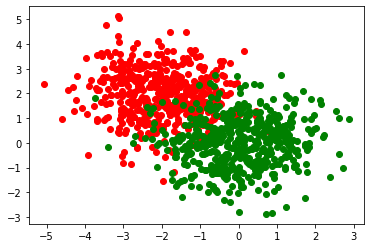

In [3]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

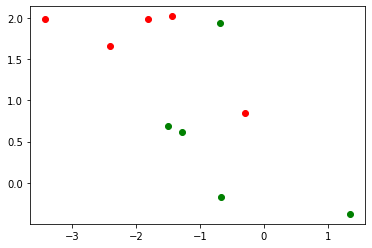

In [4]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=5)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=5)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

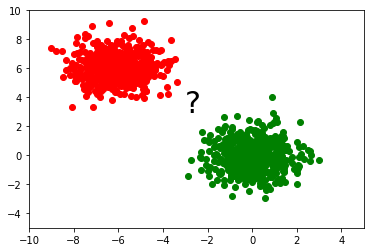

In [5]:
# generate data
dist1 = np.random.multivariate_normal([-6, 6], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

plt.xlim(-10, 5)
plt.ylim(-5, 10)
plt.text(-3, 3, "?", fontsize=30);

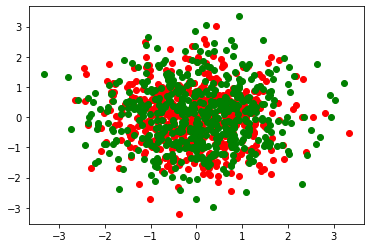

In [6]:
# generate data
dist1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

,Height,Width,Species
0,32,nan,Dog
1,23,11,Dog
2,21,28,Dog
3,30,nan,Dog
4,18,26,Dog
5,16,15,Dog
6,23,nan,Dog
7,29,12,Dog
8,22,16,Dog
9,45,nan,Dog


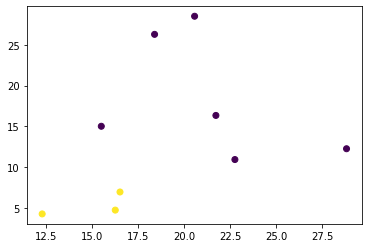

In [7]:
X1 = np.hstack((np.random.uniform(15, 50, size=10), 
                np.random.uniform(5, 20, size=4)))

X2 = np.hstack((np.random.uniform(8, 30, size=10), 
                np.random.uniform(3, 10, size=4)))

X2[::3] = np.nan

y = 10*["Dog"] + 4*["Cat"]
labels = 10*[0] + 4*[1]

plt.scatter(X1, X2, c=labels)

pd.options.display.float_format = "{:,.2g}".format
pd.DataFrame({"Height" : X1, "Width" : X2, "Species" : y})

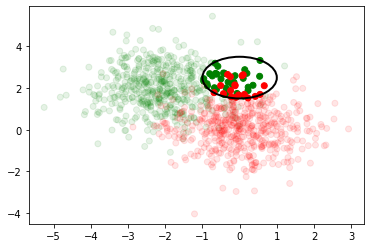

In [8]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
x0, y0, r = 0, 2.5, 1
opacities1 = np.where(np.sqrt((dist1[:,0]-x0)**2 + (dist1[:,1]-y0)**2) < r, 1, 0.1)
colors1 = np.ones((500,3)) * np.array([0, 128, 0]) / 255
colors1 = np.column_stack((colors1, opacities1))

opacities2 = np.where(np.sqrt((dist2[:,0]-x0)**2 + (dist2[:,1]-y0)**2) < r, 1, 0.1)
colors2 = np.ones((500,3)) * np.array([255, 0, 0]) / 255
colors2 = np.column_stack((colors2, opacities2))

fig, ax = plt.subplots()
ax.scatter(dist1[:, 0], dist1[:, 1], c=colors1)
ax.scatter(dist2[:, 0], dist2[:, 1], c=colors2);

circle = plt.Circle((x0, y0), 1, color="black", fill=False, lw=2)
ax.add_artist(circle);

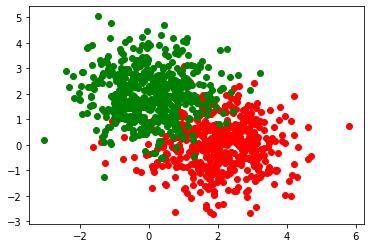

In [9]:
# generate data
dist1 = np.random.multivariate_normal([2, 0], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 2], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

### **Random points with scikit-learn**

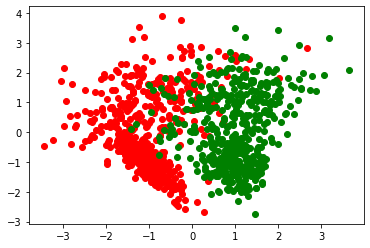

In [10]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, 
                           n_classes=2, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           random_state=666)

i1, i2 = y == 0, y == 1

plt.scatter(X[:, 0][i1], X[:, 1][i1], color='red')
plt.scatter(X[:, 0][i2], X[:, 1][i2], color='green');

### **[Scikit-learn datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)**

#### **Iris dataset**

![](https://www.aifunded.es/images/iris.png)

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

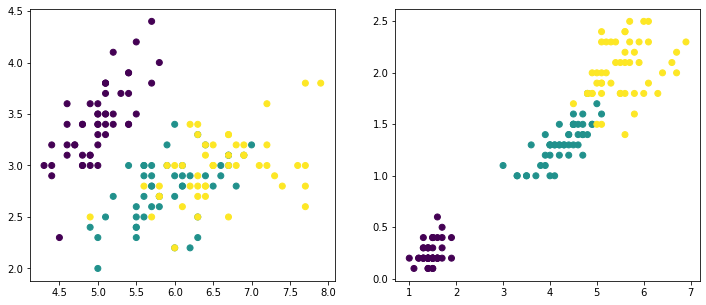

In [11]:
from sklearn.datasets import load_iris # kosatec

iris = load_iris()
X, y = iris["data"], iris["target"]

#X, y = load_iris(return_X_y = True)

i1, i2, i3 = y==0, y==1, y==2

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c=y)

iris["target_names"], iris["feature_names"]

In [12]:
!pip install corner
import corner

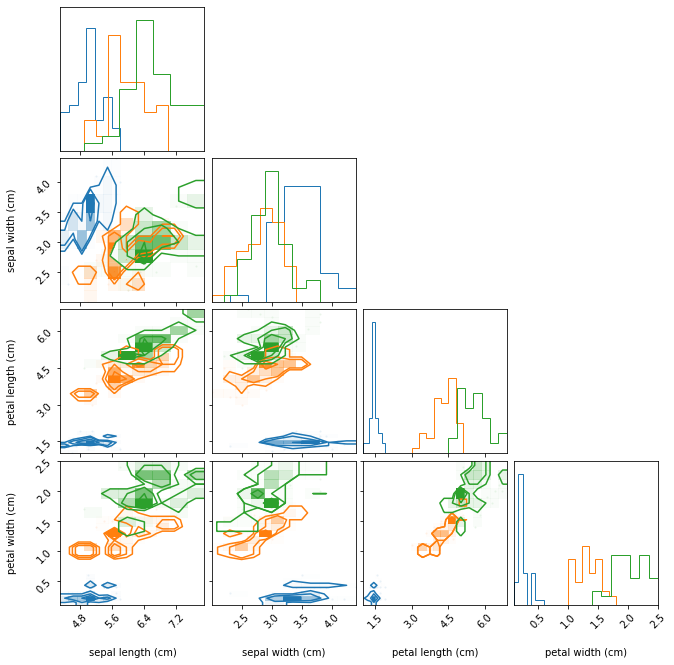

In [13]:
df = pd.DataFrame(data=iris["data"],
                  columns=iris["feature_names"])

df_1 = df[iris["target"] == 0]
df_2 = df[iris["target"] == 1]
df_3 = df[iris["target"] == 2]

kw = {"bins" : [7, 7, 7, 7]}
fig = corner.corner(df_1, color="C0", **kw)
corner.corner(df_2, fig=fig, color="C1", **kw)
corner.corner(df_3, fig=fig, color="C2", **kw);

#### **Digits**

(1797, 64)

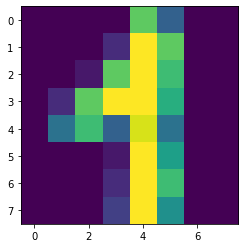

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.data[42].reshape(8,8));
digits.data.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

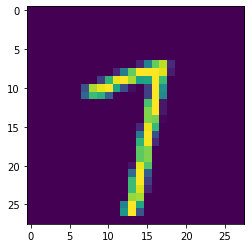

In [15]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.imshow(x_train[42]);
x_train.shape

#### **Califoria housing prices dataset**

In [16]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data["data"], columns=data['feature_names'])
X["MedHouseVal"] = data["target"]

pd.reset_option("display.float_format")
X

INFO:sklearn.datasets._california_housing:Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /root/scikit_learn_data


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


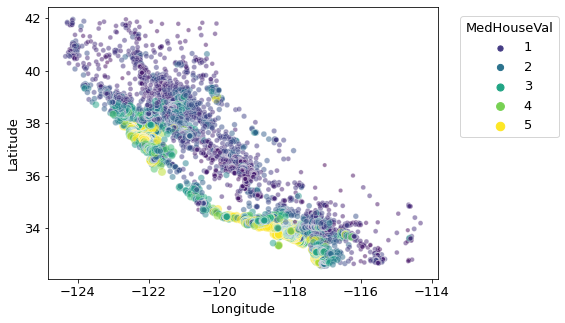

In [17]:
import seaborn as sns

plt.figure(figsize=(7,5))
plt.rc("font", size=13)
sns.scatterplot(data=X, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.04, 0.99), loc="upper left");

### **Other datasets**

[Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

[Keras](https://keras.io/api/datasets/)

[Kaggle](https://www.kaggle.com/datasets)

[OpenML](https://www.openml.org/search?type=data)

### **Our dataset**

SDSS data of point sources: stars vs Quasi-stellar objects

<img src="https://cdn.mos.cms.futurecdn.net/HgaCHZDNppE6e52yeDACo6-970-80.jpg.webp" height=200>

<img src="https://earthsky.org/upl/2021/01/supermassive-black-hole-artist-e1610556964639.jpg" height=200 align=right>



In [18]:
!wget -c "https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB" -O "sdss_photo.csv"

--2021-10-23 17:25:55--  https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving drive.google.com (drive.google.com)... 172.217.164.174, 2607:f8b0:4004:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7acqorv7kktu46cekrktplm8bq0j6frl/1635009900000/12667160157784747384/*/1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB [following]
--2021-10-23 17:25:55--  https://doc-04-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7acqorv7kktu46cekrktplm8bq0j6frl/1635009900000/12667160157784747384/*/1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving doc-04-2s-docs.googleusercontent.com (doc-04-2s-docs.googleusercontent.com)... 142.251.45.97, 2607:f8b0:4004:83f::2001
Connecting to doc-04-2s-docs.googleusercontent.com (doc-04-2s-docs.googleusercontent.com)|142.251.45.97|

In [84]:
data = pd.read_csv("sdss_photo.csv")

## **Data preprocessing**

### What to do with the data:
- look at the data
- check data quality
- understand the data
- think of selection biases

In [116]:
data

,mag_u,mag_g,mag_r,mag_i,mag_z,target,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,star,1.715000,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,star,1.393000,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,star,0.888000,0.299001,0.087999,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,star,0.844002,0.273998,0.130001,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,star,0.920000,0.264000,0.138000,-0.002001
...,...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO,0.199999,0.384001,0.035999,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO,5.004000,1.168001,0.153000,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO,0.335999,-0.092999,0.382999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO,0.044001,0.313000,0.041000,0.039000


In [117]:
data.describe().round(2)

,mag_u,mag_g,mag_r,mag_i,mag_z,u-g,g-r,r-i,i-z
count,867.00,867.00,867.00,867.00,867.00,867.00,867.00,867.00,867.00
mean,19.29,18.17,17.72,17.54,17.45,1.12,0.46,0.18,0.09
std,1.39,1.33,1.35,1.37,1.38,0.67,0.31,0.13,0.10
min,15.67,14.36,14.12,13.95,13.89,-0.95,-0.20,-0.21,-0.42
25%,18.50,17.29,16.74,16.54,16.45,0.84,0.26,0.11,0.03
50%,19.33,18.33,17.88,17.69,17.62,1.09,0.44,0.17,0.08
75%,20.02,19.09,18.76,18.61,18.52,1.46,0.60,0.25,0.14
max,26.43,25.17,21.14,20.72,20.91,5.06,4.03,1.21,0.56


#### task 1: **Create X and y**

In [118]:
cols = data.columns
cols = cols[["mag" in i for i in cols]]
X = data[cols]
X.columns = [i.split("_")[1] for i in X.columns]
X

,u,g,r,i,z
0,19.240999,17.525999,16.840000,16.613001,16.492001
1,19.732000,18.339001,17.767000,17.580000,17.481001
2,16.120001,15.232000,14.933000,14.845000,14.827000
3,18.995001,18.150999,17.877001,17.747000,17.766001
4,19.032000,18.112000,17.848000,17.709999,17.712000
...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000
863,26.433001,21.429001,20.261000,20.108000,20.073000
864,20.535999,20.200001,20.292999,19.910000,19.726000
865,20.627001,20.583000,20.270000,20.229000,20.190001


In [119]:
y = data["target"]
y

0      star
1      star
2      star
3      star
4      star
       ... 
862     QSO
863     QSO
864     QSO
865     QSO
866     QSO
Name: target, Length: 867, dtype: object

In [120]:
y = np.array(data["target"] == "QSO").astype('uint8')
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### task 2: **plot the data**

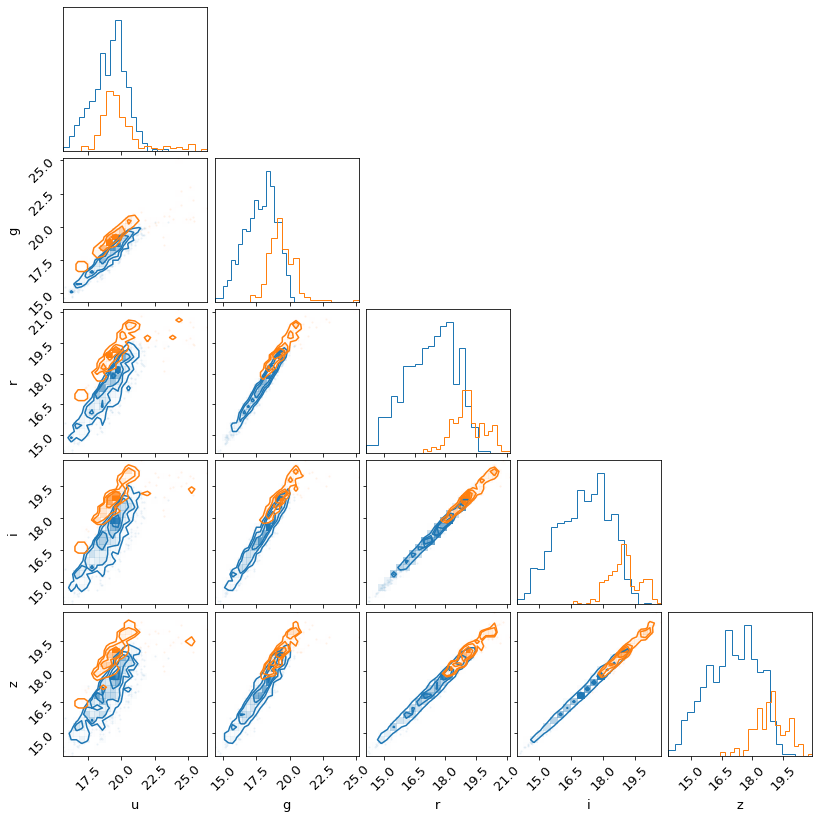

In [122]:
X1 = X[y == 0]
X2 = X[y == 1]

fig = corner.corner(X1, color="C0")
corner.corner(X2, fig=fig, color="C1");

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [128]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.describe().round(2)

,u,g,r,i,z
count,867.00,867.00,867.00,867.00,867.00
mean,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.61,-2.86,-2.65,-2.62,-2.59
25%,-0.57,-0.66,-0.72,-0.73,-0.73
50%,0.03,0.12,0.12,0.11,0.12
75%,0.53,0.69,0.77,0.78,0.77
max,5.15,5.24,2.52,2.32,2.51


## **Feature selection & reduce dimensions**

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [104]:
X_reduced = SelectKBest(chi2, k=2).fit_transform(X, y)
X_reduced[0]

array([16.61300087, 16.49200058])

In [105]:
X.loc[0]

u    19.240999
g    17.525999
r    16.840000
i    16.613001
z    16.492001
Name: 0, dtype: float64

In [106]:
from sklearn.ensemble import ExtraTreesClassifier

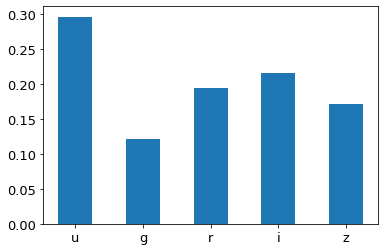

In [107]:
clf = ExtraTreesClassifier().fit(X,y)
plt.bar(np.arange(5), clf.feature_importances_, 0.5)
plt.xticks(np.arange(5), X.columns);

In [108]:
X_new = X.copy()
X_new["u-g"] = X.u - X.g
X_new["g-r"] = X.g - X.r
X_new["r-i"] = X.r - X.i
X_new["i-z"] = X.i - X.z

#for i in range(4):
#    f1, f2 = X.columns[i], X.columns[i+1]
#    X[f1+"-"+f2] = X[f1] - X[f2]

X_new

,u,g,r,i,z,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,1.715000,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,1.393000,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,0.888000,0.299001,0.087999,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,0.844002,0.273998,0.130001,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,0.920000,0.264000,0.138000,-0.002001
...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,0.199999,0.384001,0.035999,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,5.004000,1.168001,0.153000,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,0.335999,-0.092999,0.382999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,0.044001,0.313000,0.041000,0.039000


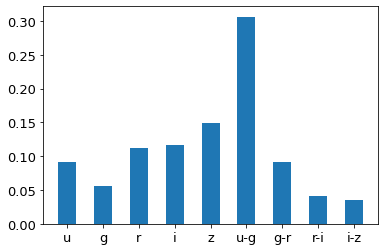

In [109]:
clf = ExtraTreesClassifier().fit(X_new,y)
plt.bar(np.arange(len(X_new.columns)), clf.feature_importances_, 0.5)
plt.xticks(np.arange(len(X_new.columns)), X_new.columns);

In [110]:
X_new2 = X_new.copy()
X_new2["u/g"] = X.u / X.g
X_new2["g/r"] = X.g / X.r
X_new2["r/i"] = X.r / X.i
X_new2["i/z"] = X.i / X.z

#for i in range(4):
#    f1, f2 = X.columns[i], X.columns[i+1]
#    X[f1+"-"+f2] = X[f1] - X[f2]

X_new2

,u,g,r,i,z,u-g,g-r,r-i,i-z,u/g,g/r,r/i,i/z
0,19.240999,17.525999,16.840000,16.613001,16.492001,1.715000,0.685999,0.226999,0.121000,1.097855,1.040736,1.013664,1.007337
1,19.732000,18.339001,17.767000,17.580000,17.481001,1.393000,0.572001,0.187000,0.098999,1.075958,1.032195,1.010637,1.005663
2,16.120001,15.232000,14.933000,14.845000,14.827000,0.888000,0.299001,0.087999,0.018001,1.058298,1.020023,1.005928,1.001214
3,18.995001,18.150999,17.877001,17.747000,17.766001,0.844002,0.273998,0.130001,-0.019001,1.046499,1.015327,1.007325,0.998930
4,19.032000,18.112000,17.848000,17.709999,17.712000,0.920000,0.264000,0.138000,-0.002001,1.050795,1.014792,1.007792,0.999887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,0.199999,0.384001,0.035999,-0.043999,1.010500,1.020576,1.001933,0.997643
863,26.433001,21.429001,20.261000,20.108000,20.073000,5.004000,1.168001,0.153000,0.035000,1.233515,1.057648,1.007609,1.001744
864,20.535999,20.200001,20.292999,19.910000,19.726000,0.335999,-0.092999,0.382999,0.184000,1.016634,0.995417,1.019237,1.009328
865,20.627001,20.583000,20.270000,20.229000,20.190001,0.044001,0.313000,0.041000,0.039000,1.002138,1.015442,1.002027,1.001932


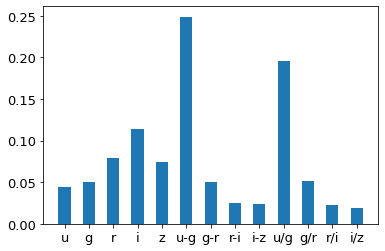

In [111]:
clf = ExtraTreesClassifier().fit(X_new2,y)
plt.bar(np.arange(len(X_new2.columns)), clf.feature_importances_, 0.5)
plt.xticks(np.arange(len(X_new2.columns)), X_new2.columns);

## **Compare classifiers**

## **Ensemble methods**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import StackingClassifier #, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

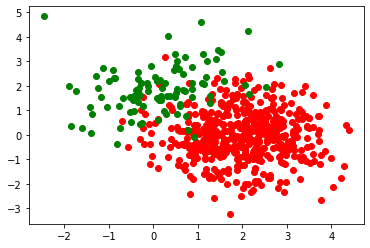

In [ ]:
data = 

X_train, X_test, y_train, y_test = train_test_split(data, labels)#, stratify=labels)

classifiers = [("svc", SVC()),
               ("DTC", DecisionTreeClassifier()),
               ("KNN", KNeighborsClassifier()),
               ("Bayes", GaussianNB())]

# train the model
model = StackingClassifier(classifiers)
#model = RandomForestClassifier()
#model = BaggingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# find accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.96

# **OpenAI**

### **Compare classifiers**

In [ ]:
'''
1. generate 2 dimensional data with two distinct classes.
2. classify the data using various classifiers.
3. compare the classifiers.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate data
np.random.seed(0)
x1 = np.random.normal(size=(100, 2))
x2 = np.random.normal(loc=2, size=(100, 2))
x = np.vstack((x1, x2))
y = np.array([0] * 100 + [1] * 100)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# train and test
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

### **Grid search**

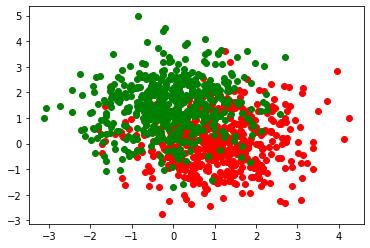

0.788
{'max_depth': 5, 'n_estimators': 30}
0.8093333333333333


In [ ]:
'''
1. generate 2 dimesional data with two distinct classes.
2. classify the data using random forest classifier.
3. find best hyperparameters using grid search.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate data
mean1 = [1, 0]
cov1 = [[1, 0.1], [0.1, 1]]
mean2 = [0, 1.5]
cov2 = [[1, 0.1], [0.1, 1]]
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green')
plt.show()

# prepare data for classification
data = np.zeros((1000, 3))
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, -1])

# train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# find accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# find best hyperparameters using grid search
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7]}

grid_search = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)